# PyRoot

## Excersice 1

In [1]:
import sys
import ROOT, array
from math import *
import random
import math
import argparse




from ROOT import TRandom, TFile, TLorentzVector
from ROOT.std import vector
from array import array


Welcome to JupyROOT 6.10/04


In [2]:
fs = ROOT.TFile.Open("/home/tomas/Descargas/NewTree.root")
s = fs.Get("SystemTree")
#t = ROOT.ExRootTreeReader(s)
ns= s.GetEntries()
print(ns)
nbins1= 160
nbins1_2= 50
nbins2= 40
nbins3= 100
nbins4 = 120
nbins5 = 110



50000


In [3]:
def Histo(hs):                     #Function for The Histogram
    canvas = ROOT.TCanvas()
    hs.SetStats(0)
    canvas.cd()
    hs.Draw("pe")
    canvas.Draw()
    
def DeltaPhi(phi1,phi2):           #Calculates Delta Phi between 0 an 2*pi
    PHI=phi1-phi2
    if PHI >= pi:
        PHI -= 2*pi
    elif PHI < -1*pi:
        PHI += 2*pi
    return abs(PHI)
def DeltaEta(eta1,eta2):
    return abs(eta1-eta2)         #Calculates Delta Eta

def m_Tot(px1,py1,pt1,px2,py2,pt2,px3,py3,pt3):  #Calculates TotalMass from 5.4  https://arxiv.org/pdf/1709.07242.pdf 
    vec1 = [px1 , py1]
    vec2 = [px2 , py2]
    vec3 = [px3 , py3]
    norma1 = (vec1[0]**2+vec1[1]**2)**0.5
    norma2 = (vec2[0]**2+vec2[1]**2)**0.5
    norma3 = (vec3[0]**2+vec3[1]**2)**0.5
    return (((pt1+pt2+pt3)**2)+((norma1+norma2+norma3)**2))**0.5

def TransverseMass(pt1,pt2,phi):
    return (2*pt1*pt2*(1-cos(phi)))**0.5
    


In [4]:
#Creates the Canvas for the Histograms

h1PTBtau = ROOT.TH1F("h1biPTTauB", "P_{T} (bJet+Tau)", 100, 0.0, 600)
h1PhiBTau = ROOT.TH1F("h1biPhiTauB", "\Delta\phi (bJet+Tau)", 100, 0, 3.5)
h1EtaBTau = ROOT.TH1F("h1biEtaTauB", "\Delta\eta (bJet+Tau)", 100, 0, 6)
hMTot_TauBMet = ROOT.TH1F("hMT_TauBMet", " m_{Tot} (bJet+Tau+MET)", 90, 0, 2400)
hMT_TauMet = ROOT.TH1F("hMT_TauMet", " m_{T} (Tau+MET)", 90, 0, 1400)
hMT_BMet = ROOT.TH1F("hMT_BMet", " m_{T} (bJet+MET)", 90, 0, 1100)
h1biMass = ROOT.TH1F("h1biMass", " Ivariant_Mass (bJet+Tau)", 100, 0, 100)
hDelR = ROOT.TH1F("hDelR", "\Delta R (Tau+b)", 100,0,15)
hDelPhiBMet = ROOT.TH1F("h1PhiBMet", "\Delta\phi (bJet+MET)", 100, 0, 3.5)
hDelPhiTauMet = ROOT.TH1F("h1PhiTauMet", "\Delta\phi (Tau+MET)", 100, 0, 3.5)


In [5]:

count1 = 0

for event in xrange(ns):
    s.GetEntry(event)
    jet1 = getattr(s, 'Jet1')            #Calls the Jet1 branch in the root file and name it jet1
    jet2 = getattr(s, 'Jet2')
    jet3 = getattr(s, 'Jet3')
    jet4 = getattr(s, 'Jet4')
    tagJet1B = getattr(s, 'b_Jet1Tag')   #Calls the b_Jet1Tag branch in the root file and name it tagJet1B
    tagJet2B = getattr(s, 'b_Jet2Tag')
    tagJet3B = getattr(s, 'b_Jet3Tag')
    tagJet4B = getattr(s, 'b_Jet4Tag')
    MissNRG_Phi = getattr(s, 'METPhi')
    MissNRG_T = getattr(s, 'METNRGT')
    MET_Eta = getattr(s, 'METEta')
    tagJet1Tau = getattr(s, 'Tau_Jet1Tag')
    tagJet2Tau = getattr(s, 'Tau_Jet2Tag')
    tagJet3Tau = getattr(s, 'Tau_Jet3Tag')
    tagJet4Tau = getattr(s, 'Tau_Jet4Tag')
    
    cond1 = (tagJet1B == 1 and tagJet2Tau == 1) #Condicional for the filter jet= b-quark, jet2 = Tau
    cond2 = (tagJet1B == 1 and tagJet3Tau == 1) #Condicional for the filter jet= b-quark, jet3 = Tau
    cond3 = (tagJet1B == 1 and tagJet4Tau == 1) #Condicional for the filter jet= b-quark, jet4 = Tau
    
    cond4 = (tagJet2B == 1 and tagJet1Tau == 1)
    cond5 = (tagJet2B == 1 and tagJet3Tau == 1)
    cond6 = (tagJet2B == 1 and tagJet4Tau == 1)
    
    cond7 = (tagJet3B == 1 and tagJet1Tau == 1)
    cond8 = (tagJet3B == 1 and tagJet2Tau == 1)
    cond9 = (tagJet3B == 1 and tagJet4Tau == 1)
    
    cond10 = (tagJet4B == 1 and tagJet1Tau == 1)
    cond11 = (tagJet4B == 1 and tagJet2Tau == 1)
    cond12 = (tagJet4B == 1 and tagJet3Tau == 1)
    
    
    if cond1 :
        count1 =count1+1
        jetb=jet1
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond2 :
        count1 =count1+1
        jetb=jet1
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond3 :
        count1 =count1+1
        jetb=jet1
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond4 :
        count1 =count1+1
        jetb=jet2
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond5 :
        count1 =count1+1
        jetb=jet2
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond6 :
        count1 =count1+1
        jetb=jet2
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond7 :
        count1 =count1+1
        jetb=jet3
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond8 :
        count1 =count1+1
        jetb=jet3
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond9 :
        count1 =count1+1
        jetb=jet3
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond10 :
        count1 =count1+1
        jetb=jet4
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond11 :
        count1 =count1+1
        jetb=jet4
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
        
    if cond12 :
        count1 =count1+1
        jetb=jet4
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Phi(),jettau.Phi()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = (((DeltaEta(jetb.Eta(),jettau.Eta()))**2)+((DeltaPhi(jetb.Eta(),jettau.Eta()))**2))**0.5
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        
    
    #if (tagJet1B == 1 and tagJet2B == 1 ):
    #    count = count +1
    #    h1biPT.Fill(jet1.Pt()+jet2.Pt())
    #    h1biPhi.Fill(abs(DeltaPhi(jet1.Phi(),jet2.Phi())))
    #    h1biEta.Fill(DeltaEta(jet1.Eta(),jet2.Eta()))
        
        
        
        
    #if (tagJet1B == 1 ):
    #    count4 = count4 + 1
    #    deltaPhi_BMetF = abs(DeltaPhi(jet1.Phi(),MissNRG_Phi))
    #    hDelPhi_BMet.Fill(deltaPhi_BMetF)
        
        
        
    #if (tagJet1Tau == 1):
    #    count5 = count5 + 1
    #    deltaPhi_TauMetF = abs(DeltaPhi(jet1.Phi(),MissNRG_Phi))
    #    hDelPhi_TauMet.Fill(deltaPhi_TauMetF)
        
        
        
    #if jet1.M() > 0:
    #    count2= count2 + 1
    #    h1PT1.Fill(jet1.Pt())
    #    h1Phi1.Fill(jet1.Phi())
    #    h1Eta1.Fill(jet1.Eta())
        
    #if (tagJet1B == 1 and tagJet2Tau == 1  or tagJet1Tau == 1 and tagJet2B == 1 ):
    #    diJetMass_B = jet1.M()+jet2.M()
    #    count3 = count3 +1
    #    h1biPT2.Fill(jet1.Pt()+jet2.Pt())
    #    h1biPhi2.Fill(abs(DeltaPhi(jet1.Phi(),jet2.Phi())))
    #    h1biEta2.Fill(abs(jet1.Eta()-jet2.Eta()))
    #    h1biMass.Fill(jet1.M()+jet2.M())
    #    hMT_TauBMet.Fill(m_T(jet1.Px(),jet1.Py(),jet1.Pt(),jet2.Px(),jet2.Py(),jet2.Pt(),
    #                      MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
    #    delta_R = (((DeltaEta(jet1.Eta(),jet2.Eta()))**2)+((DeltaPhi(jet1.Eta(),jet2.Eta()))**2))**0.5
    #    hDelR.Fill(delta_R)
    
    

print(sqrt(count1))

98.5849887153


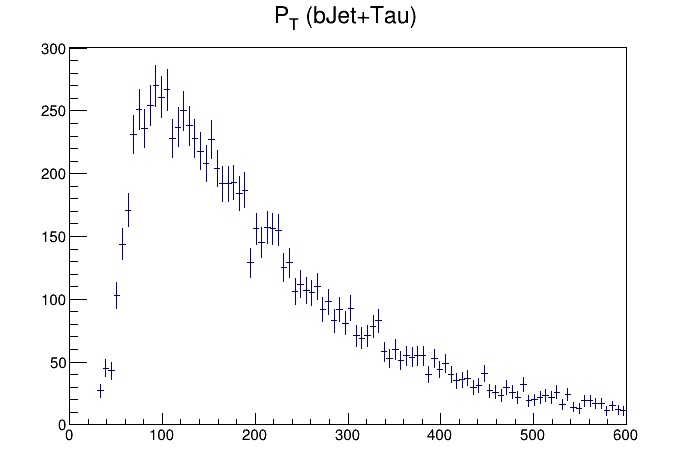

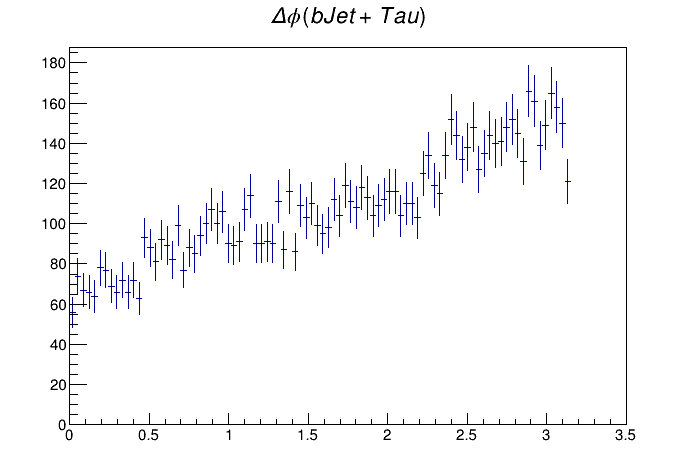

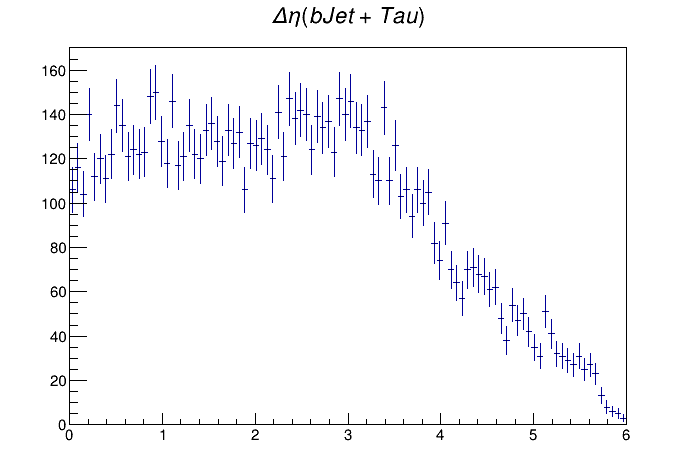

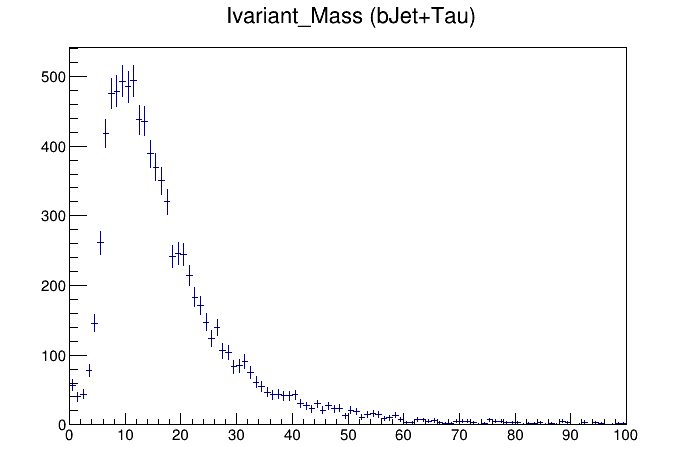

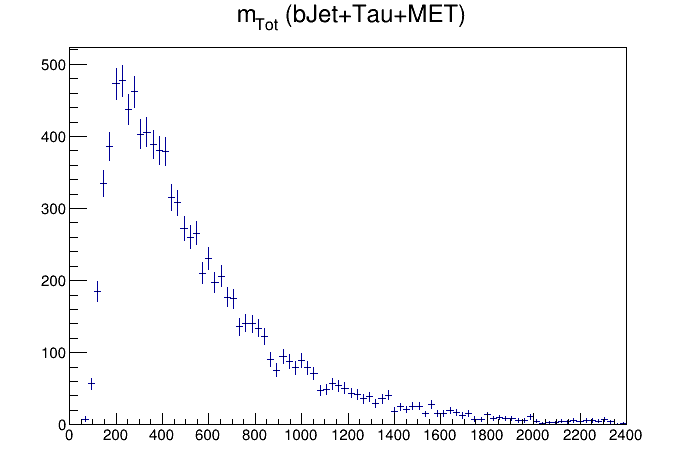

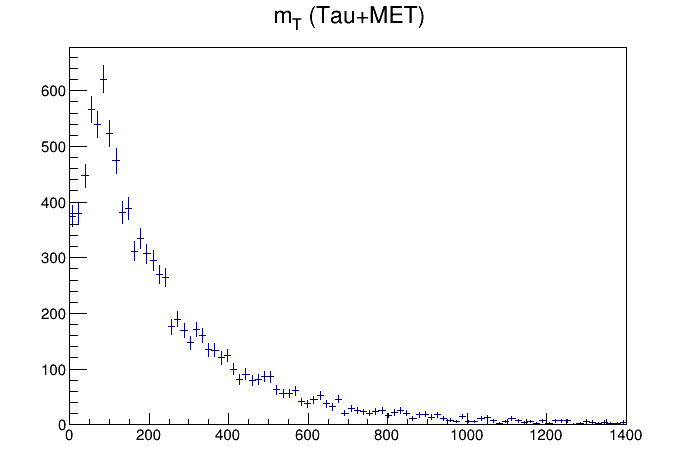

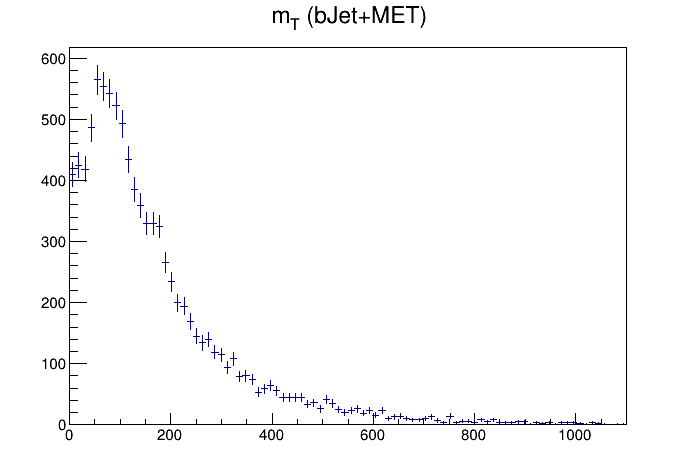

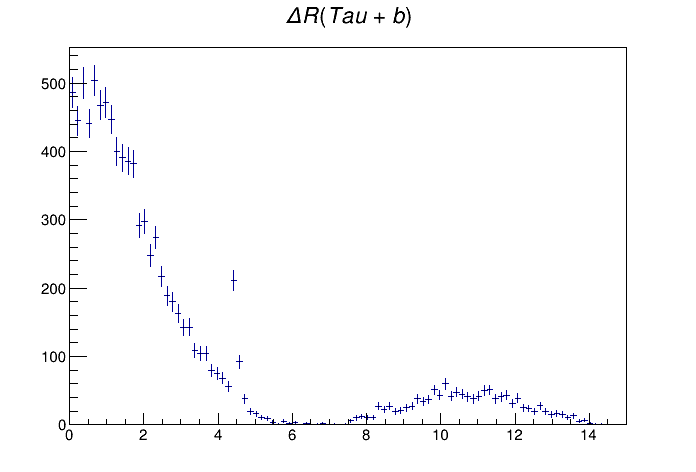

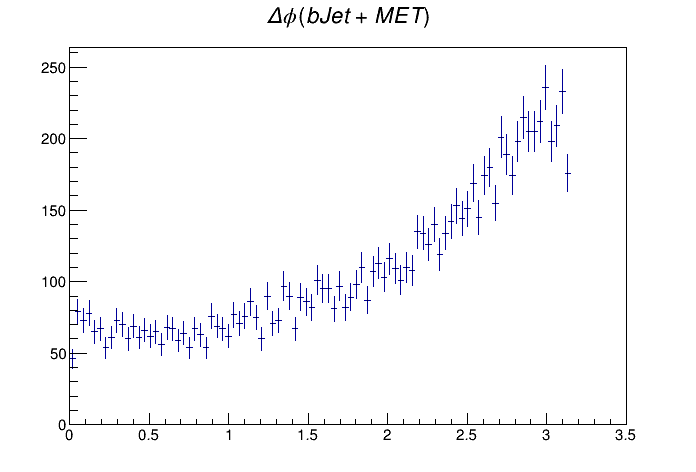

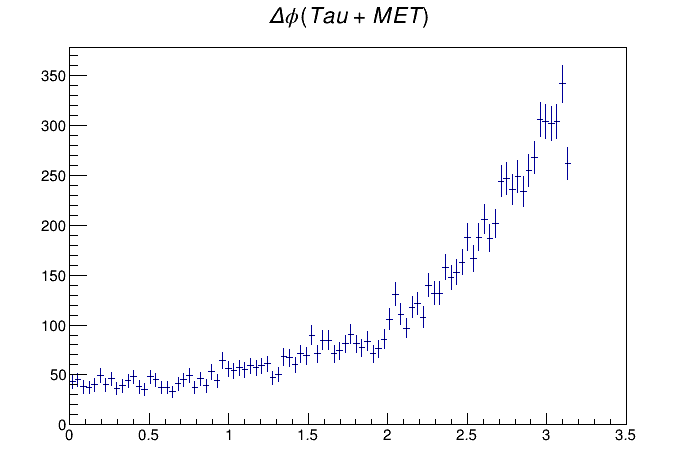

In [6]:
Histo(h1PTBtau)
Histo(h1PhiBTau)
Histo(h1EtaBTau)
Histo(h1biMass)
Histo(hMTot_TauBMet)
Histo(hMT_TauMet)
Histo(hMT_BMet)
Histo(hDelR)
Histo(hDelPhiBMet)
Histo(hDelPhiTauMet)